In [1]:
# Final Project physics 140
# Created by Peter Nguyen 
# Prompt: Use reinforced learning and the bellman equation to train an agent to solve mazes.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load in maze from file
def load_maze(mazename):
    return np.load(mazename)

maze = load_maze("maze3by3.npy")


# Boundary Setting
L = 3 # length
win_x, win_y = 2,2

# Q_table creation
# right:0 left:1 down:2 up:3
q_table = np.zeros((L,L,4), int)

for i in range(L):
    for j in range(L):
        if j == 0: # up // left on 2d array
            q_table[i,j,1] = -100
            print(q_table[i,j])
        if i == 0: # right // up on 2d
            q_table[i,j,3] = -100
            print(q_table[i,j])
        if j == L-1: # left // right
            q_table[i,j,0] = -100
            print(q_table[i,j])
        if i == L-1: # right // down
            q_table[i,j,2] = -100
            print(q_table[i,j])
        print(maze[i,j])
            
        # for obstacle placement, we treat them as badly as wall boundaries
        if maze[i,j] == -100:
            print('obstacle at',(i,j))
            # boundary checker
            if i > 1: # down
                q_table[i-1,j,2] = -100
                
            if i < L-1:# up
                q_table[i+1,j,3] = -100
                
            if j > 1: # right
                q_table[i,j-1,0] = -100
                
            if j < L-1: #left
                q_table[i,j+1,1] = -100
                

# for winning spot
q_table[win_x-1,win_y,2] = 100
#q_table[win_x+1,win_y,3] = 100
q_table[win_x,win_y-1,0] = 100
#q_table[win_x,win_y+1,1] = 100

[   0 -100    0    0]
[   0 -100    0 -100]
0
[   0    0    0 -100]
0
[   0    0    0 -100]
[-100    0    0 -100]
-100
obstacle at (0, 2)
[   0 -100    0    0]
0
0
[-100    0    0 -100]
0
[   0 -100    0    0]
[   0 -100 -100    0]
0
[   0    0 -100    0]
0
[-100    0    0    0]
[-100    0 -100    0]
0


In [3]:
count = 0
print("                   right left down up")
for j in range(L):
    for i in range(L):
        count+=1
        print(count, 'coords:',(i,j),q_table[i,j])

                   right left down up
1 coords: (0, 0) [   0 -100    0 -100]
2 coords: (1, 0) [   0 -100    0    0]
3 coords: (2, 0) [   0 -100 -100    0]
4 coords: (0, 1) [-100    0    0 -100]
5 coords: (1, 1) [0 0 0 0]
6 coords: (2, 1) [ 100    0 -100    0]
7 coords: (0, 2) [-100    0    0 -100]
8 coords: (1, 2) [-100    0  100 -100]
9 coords: (2, 2) [-100    0 -100    0]


In [4]:
# define class of agent
class agent():
    # Default Constructor
    def __init__(self, name, pos_x = 0, pos_y = 0):
        self.name = name
        self.position_x = pos_x
        self.position_y = pos_y
        print("agent created:",name)
        
    def curr_position(self):
        return (self.position_x,self.position_y)
    
    def set_curr_position(self,new_x,new_y):
        self.position_x = new_x
        self.position_y = new_y
        
    def get_x(self):
        return self.position_x
    
    def get_y(self):
        return self.position_y
    
        
    # Movement method for our agent
    def movement(self, maze, move):
        #view_maze(maze)
        print("new movement made",move)
        
        # go right
        if move == 0:
            self.position_y+=1
            print("right")
        # go left
        elif move == 1:
            self.position_y-=1
            print("left")
        # move down
        elif move == 2:
            self.position_x+=1
            print("down")
        # move up
        elif move == 3:
            self.position_x-=1
            print("up")
        else:
            print("stay still")
            
p1 = agent("Agent 1", 0,0)

agent created: Agent 1


In [5]:
def getAllPossibleMove(cur_x, cur_y):
    # list comprehension check on positioning
    poss_step = [x != -100 for x in q_table[cur_x,cur_y]]
    action = []
    #print(poss_step)
    if(poss_step[0]):
        action.append(0)
    if(poss_step[1]):
        action.append(1)
    if(poss_step[2]):
        action.append(2)
    if(poss_step[3]):
        action.append(3)
    #print('a',action)
    return action


def peek_next(choice, cur_x, cur_y, maze):
    if cur_y < L-1:
        if choice == 0 and maze[cur_x, cur_y + 1] != -100: # right
            return True
    elif cur_y > 1:
        if choice == 1 and maze[cur_x, cur_y - 1] != -100: # left
            return True
    elif cur_x > 1:
        if choice == 2 and maze[cur_x + 1, cur_y] != -100: # down
            return True
    elif cur_x < L-1:
        if choice == 3 and maze[cur_x - 1, cur_y] != -100: # down
            return True
    
    else:
        return False
    

def getWinningMove(cur_x, cur_y, q_matrix, maze):
    poss_step = [x != -100 for x in q_table[cur_x,cur_y]]
    print(q_matrix[cur_x,cur_y])
    max_val = max(poss_step)
    #print('max value: ',max_val)
    max_index = np.argmax(max_val)
    for i in range(4): # check for dupes and boundaries
        print(poss_step[i])
        if poss_step[i] and peek_next(i, cur_y, cur_x, maze):
            max_index = i
    #print('index:',max_index)
    print("WTF",max_index)
    return max_index




def CheckGameOver(cur_x,cur_y, maze, win_x, win_y):
    if cur_x == win_x and cur_y == win_y:
        print("win")
        return True
    elif maze[cur_x,cur_y] == -100:
        print("Death")
        return True
    elif cur_x == L or cur_y == L or cur_x == -1 or cur_y == -1:
        print("fell out of bounds")
        return True
    else:
        print("its okay")
        return False

start of new episode -----------------
random x y 1 0
its okay
exploiting..
[   0 -100    0    0]
True
False
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


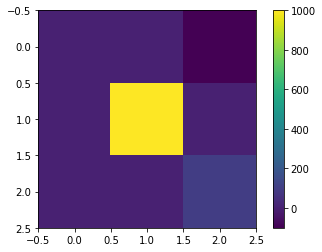

its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


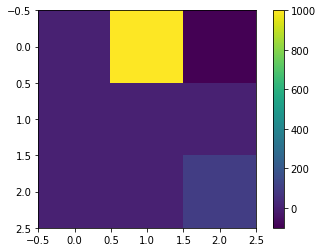

its okay
exploiting..
[   0 -100    0    0]
True
False
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


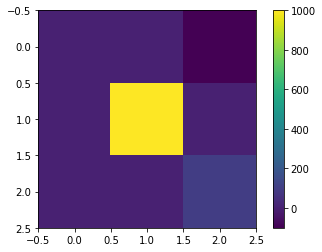

its okay
exploiting..
[0 0 0 0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


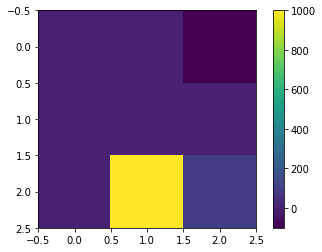

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0    0 1000]]


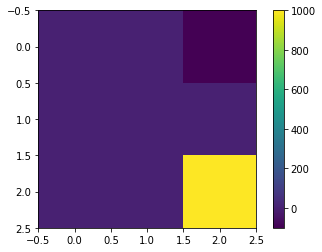

win
spawned on goal or death
----------------end spot----------------
Episode 0 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


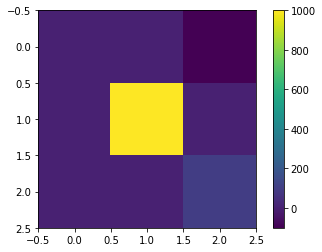

its okay
exploiting..
[90  0  0  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


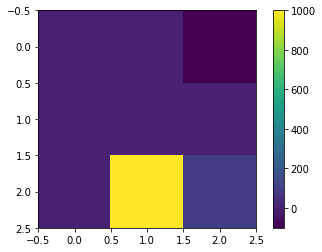

its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


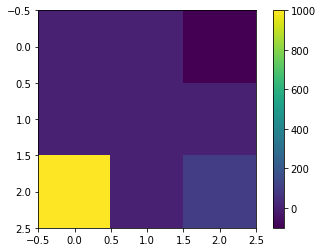

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


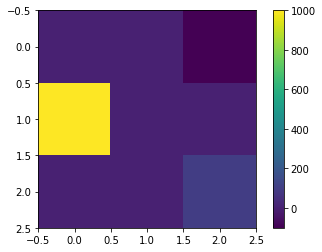

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


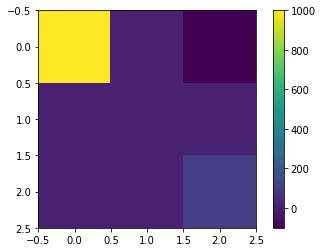

its okay
exploiting..
[   0 -100    0 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


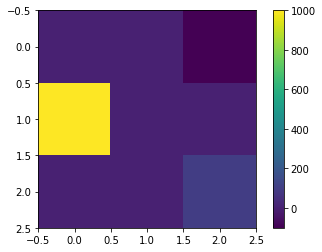

its okay
exploiting..
[   0    0    0 -100]
True
True
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


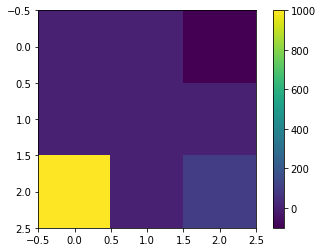

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


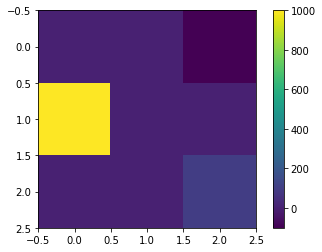

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


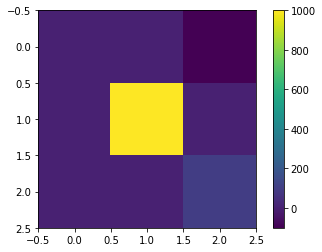

its okay
exploiting..
[90  0  0  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


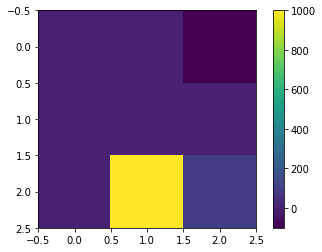

its okay
exploiting..
[-100    0  100   81]
False
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 1 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


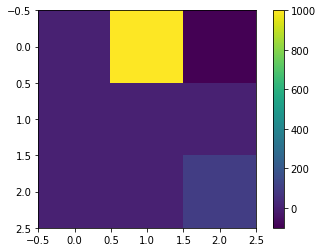

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


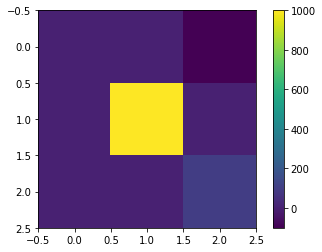

its okay
exploiting..
[90  0  0  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


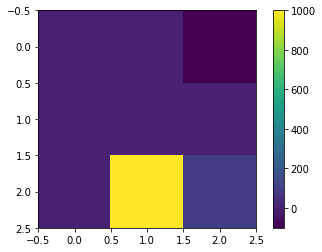

its okay
exploiting..
[-100    0  100   81]
False
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 2 done ---------------------------------
start of new episode -----------------
random x y 0 2
its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 3 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[   0 -100    0 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


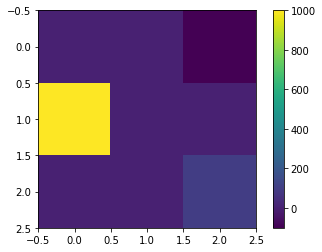

its okay
exploiting..
[  81    0    0 -100]
True
True
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


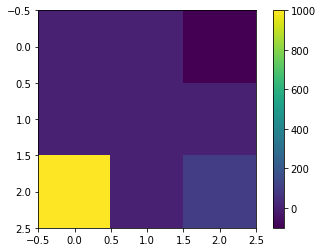

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 4 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0 1000]
 [   0    0  100]]


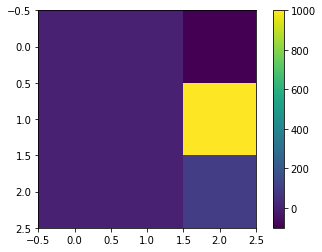

its okay
exploring..
new movement made 2
down
went to outer bounds
----------------end spot----------------
Episode 5 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


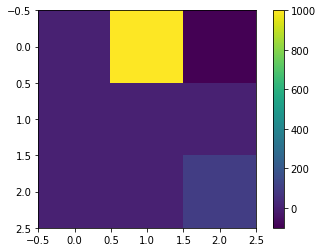

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


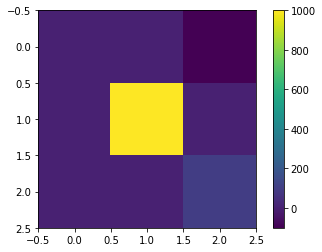

its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


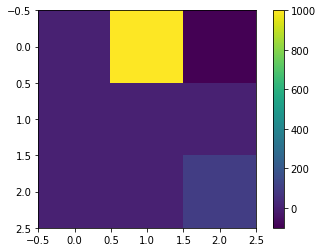

its okay
exploiting..
[ 0  0 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


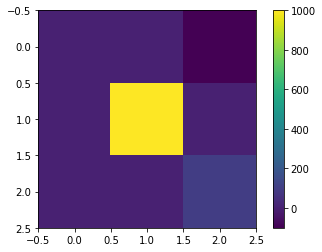

its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


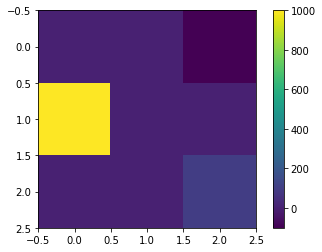

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


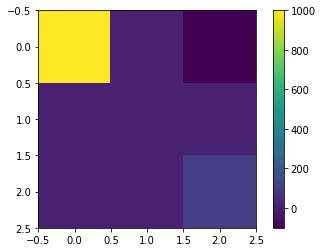

its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


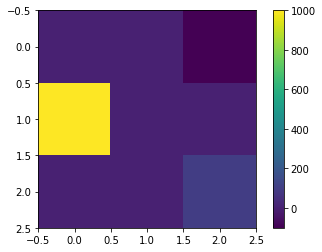

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


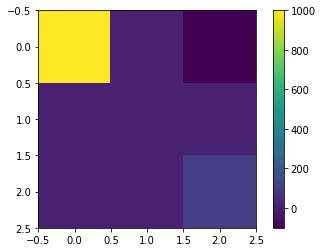

its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


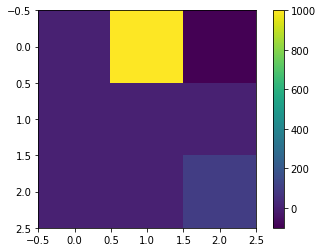

its okay
exploring..
new movement made 1
left
went to outer bounds
----------------end spot----------------
Episode 6 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 7 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0    0 1000]]


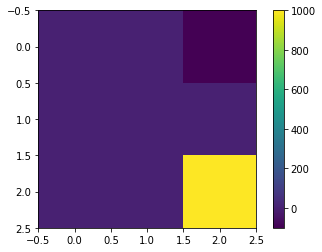

win
spawned on goal or death
----------------end spot----------------
Episode 8 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


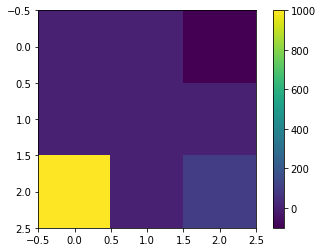

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


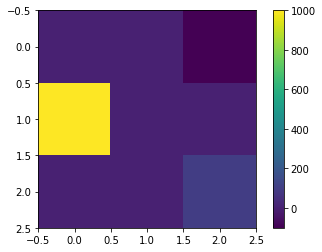

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


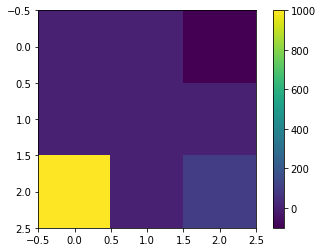

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


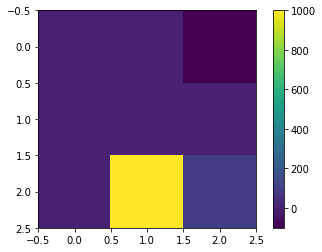

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 9 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


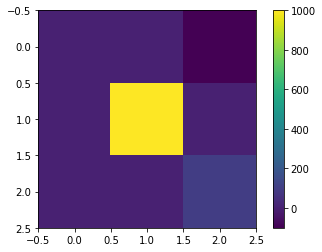

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


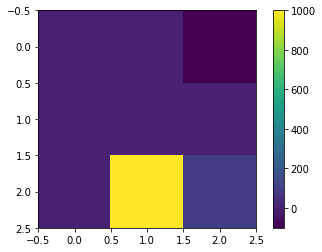

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 10 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


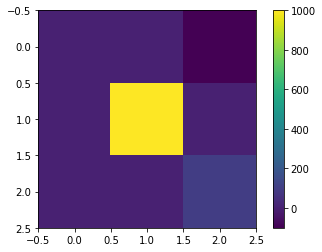

its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


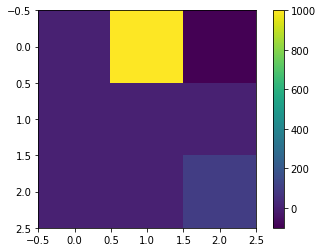

its okay
exploring..
new movement made 1
left
went to outer bounds
----------------end spot----------------
Episode 11 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100   0   0   0]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


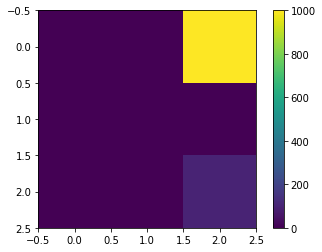

Death
spawned on goal or death
----------------end spot----------------
Episode 12 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 13 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


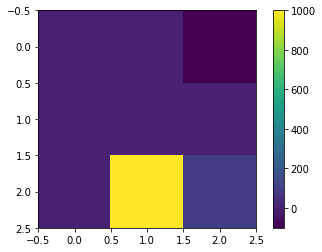

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 14 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


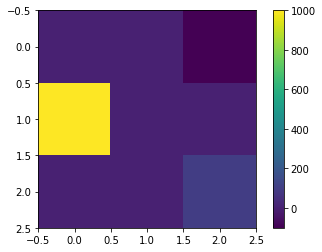

its okay
exploiting..
[  81    0    0 -100]
True
True
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


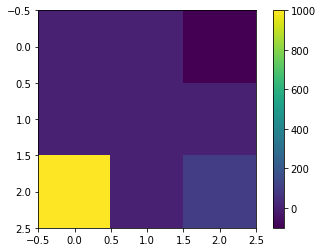

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


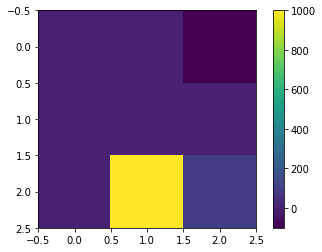

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 15 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 16 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 3
up
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


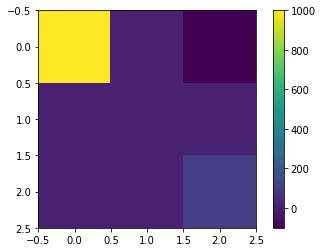

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


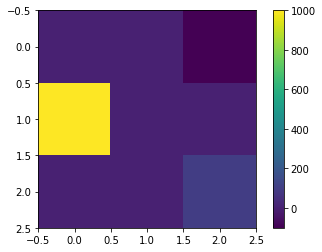

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


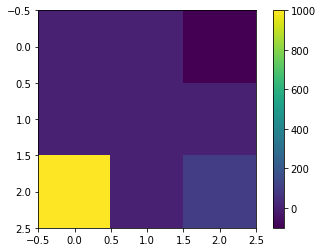

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 17 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0    0 1000]]


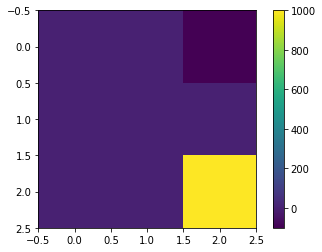

win
spawned on goal or death
----------------end spot----------------
Episode 18 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploring..
new movement made 3
up
went to outer bounds
----------------end spot----------------
Episode 19 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 20 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 21 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


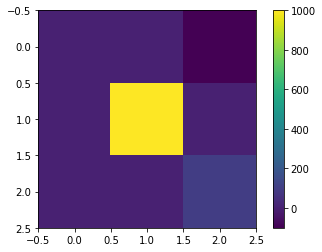

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


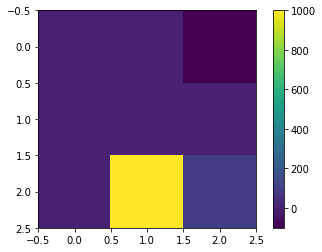

its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


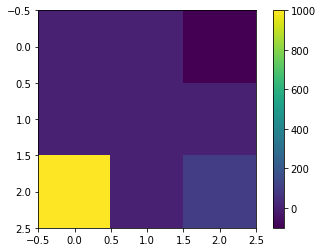

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


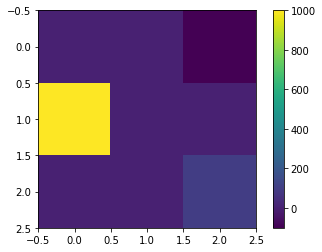

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


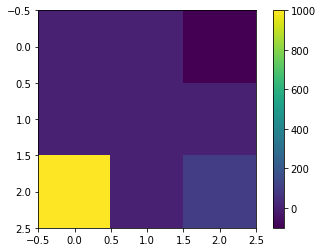

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 22 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


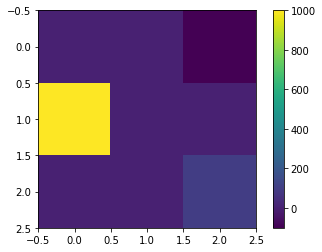

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


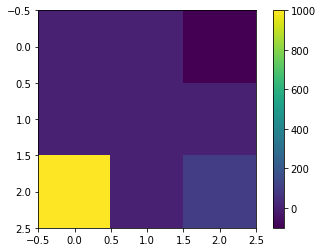

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 23 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


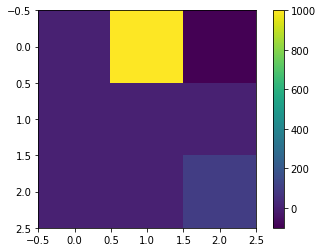

its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


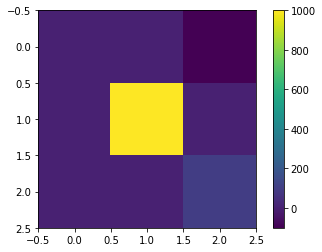

its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


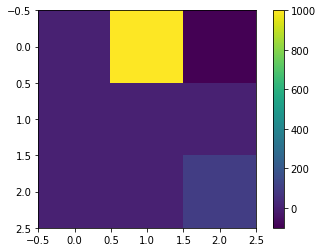

its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


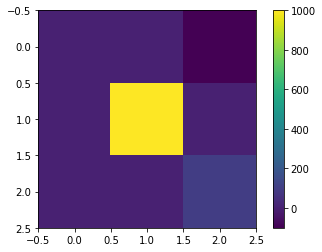

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


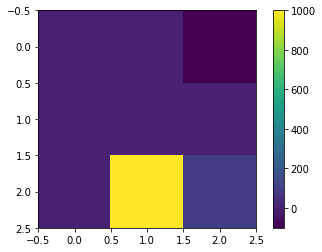

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 24 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


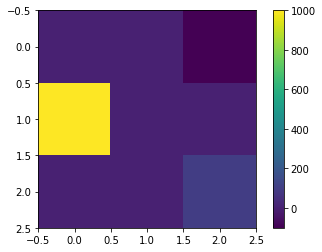

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


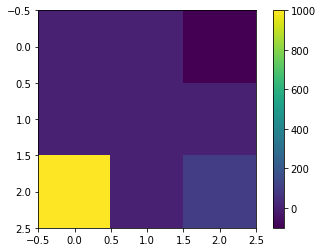

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 25 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


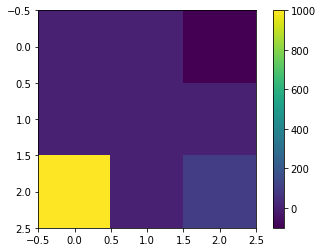

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


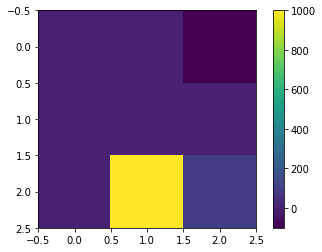

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 26 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 27 done ---------------------------------
start of new episode -----------------
random x y 0 2
its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 28 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


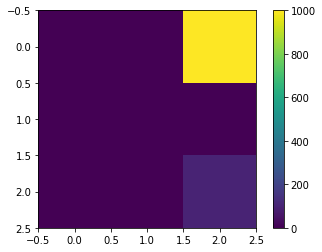

Death
spawned on goal or death
----------------end spot----------------
Episode 29 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


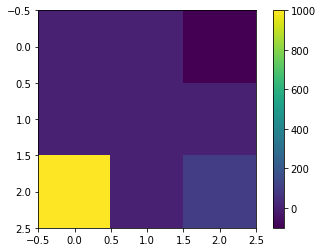

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 30 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


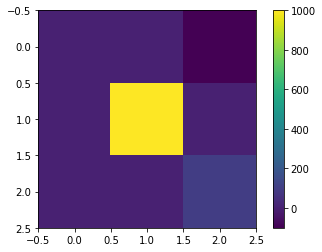

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


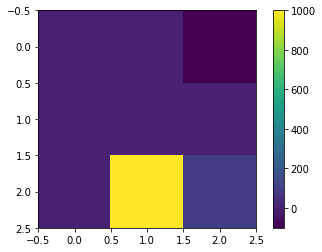

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 31 done ---------------------------------
start of new episode -----------------
random x y 0 2
its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


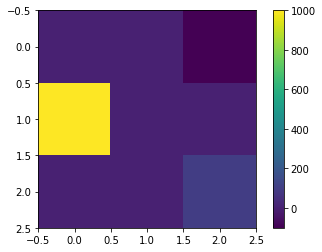

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


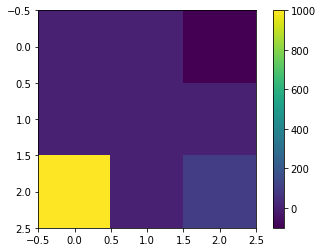

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 32 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


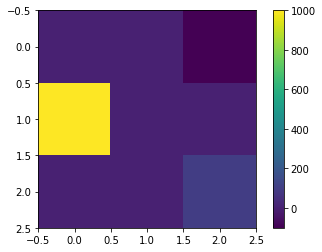

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


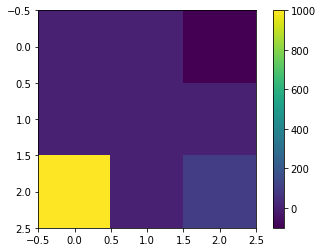

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 33 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 34 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 35 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


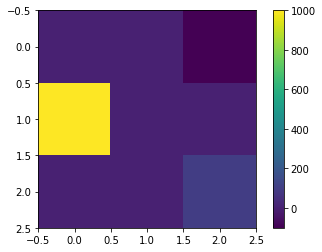

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


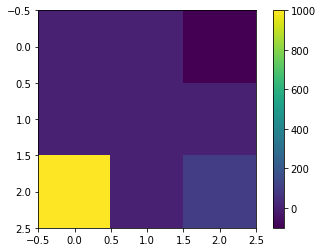

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 36 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 37 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 38 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 39 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 2
dow

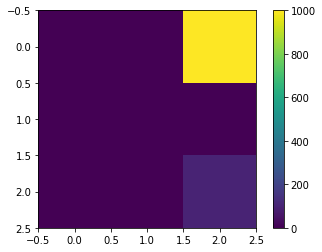

Death
spawned on goal or death
----------------end spot----------------
Episode 40 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 41 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


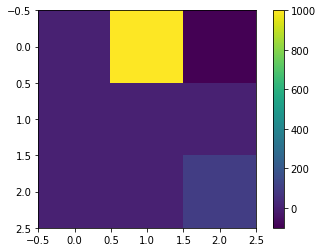

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


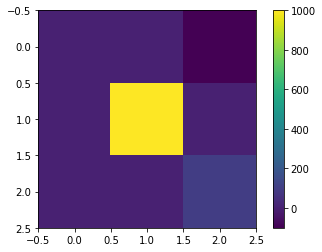

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


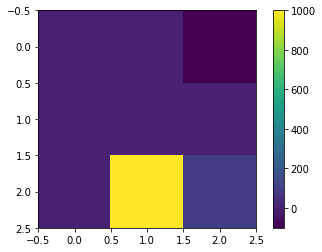

its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


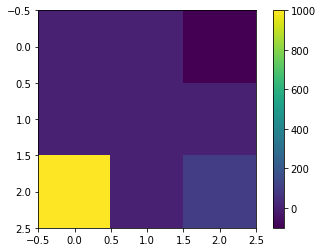

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


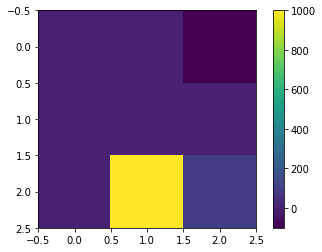

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 42 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 2
down
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


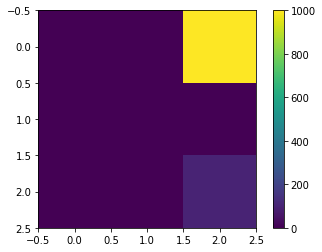

Death
spawned on goal or death
----------------end spot----------------
Episode 43 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


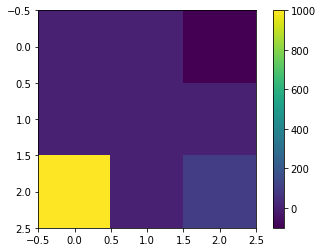

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


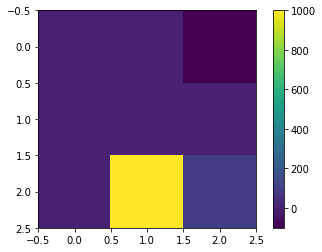

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 44 done ---------------------------------
start of new episode -----------------
random x y 0 2
its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


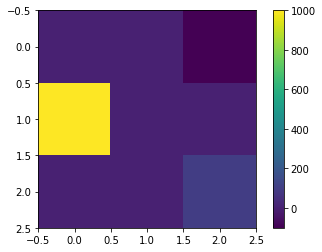

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


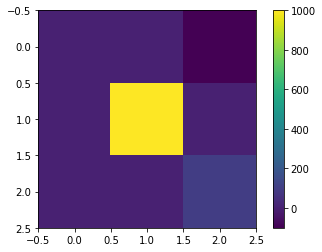

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


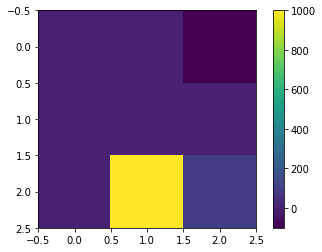

its okay
exploring..
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 45 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100   0   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


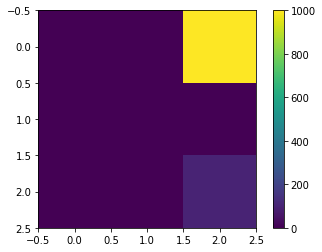

Death
spawned on goal or death
----------------end spot----------------
Episode 46 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 47 done ---------------------------------
start of new episode -----------------
random x y 0 2
its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


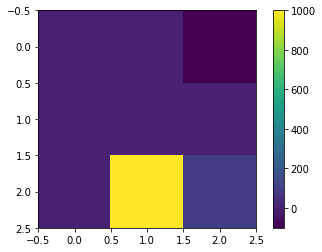

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 48 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


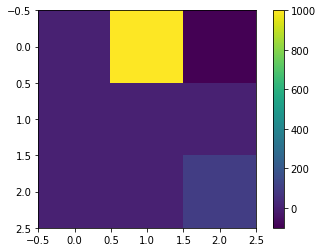

its okay
exploring..
new movement made 3
up
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


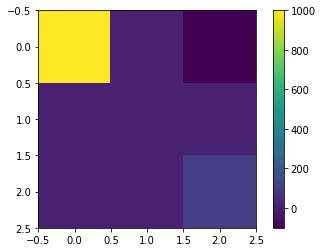

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


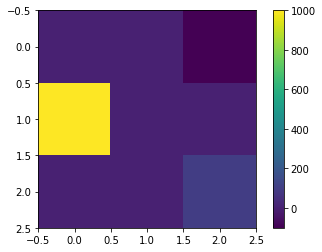

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


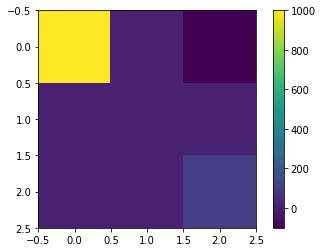

its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


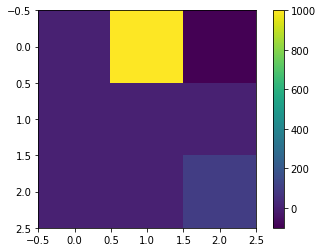

its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


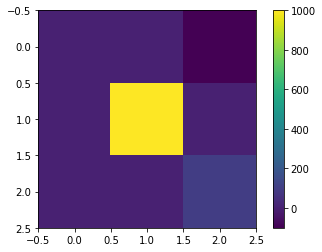

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


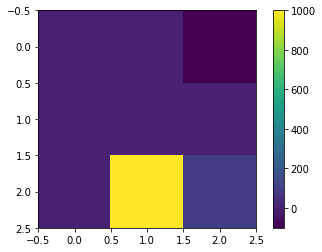

its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


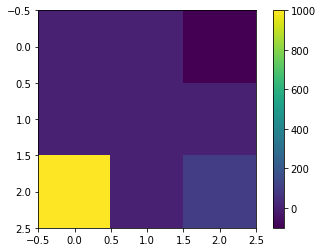

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 49 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


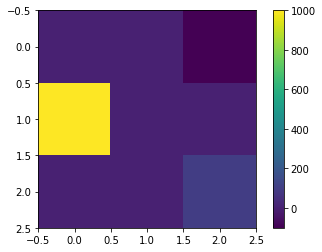

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


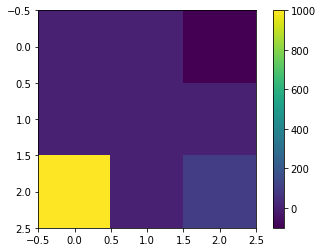

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 50 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100   0   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


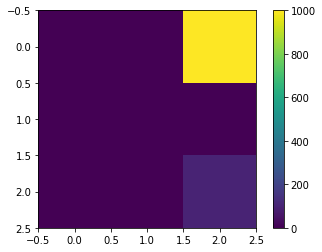

Death
spawned on goal or death
----------------end spot----------------
Episode 51 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


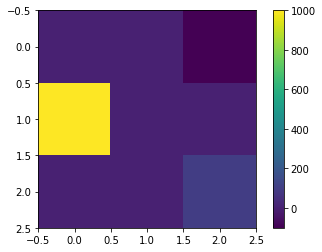

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


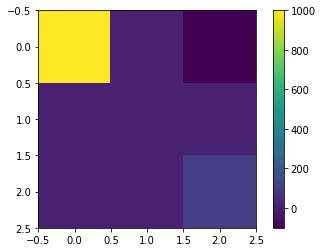

its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


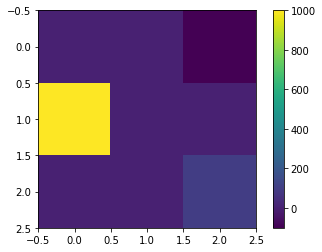

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


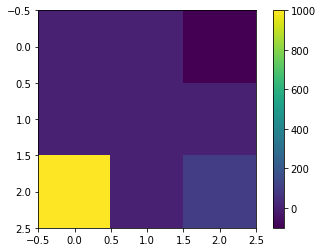

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 52 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


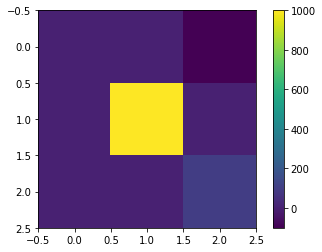

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


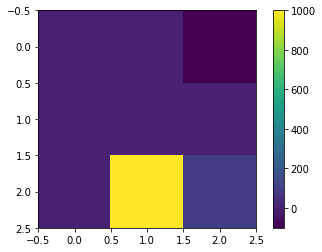

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 53 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 54 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


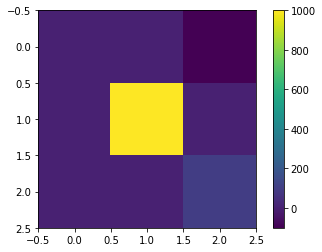

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0 1000]
 [   0    0  100]]


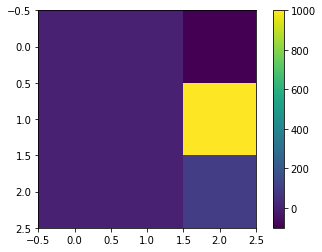

its okay
exploring..
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


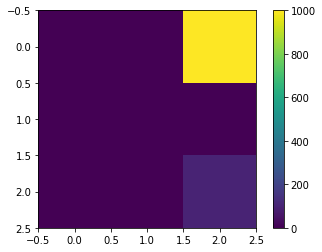

Death
spawned on goal or death
----------------end spot----------------
Episode 55 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 2
down
went to outer bounds
----------------end spot----------------
Episode 56 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 57 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


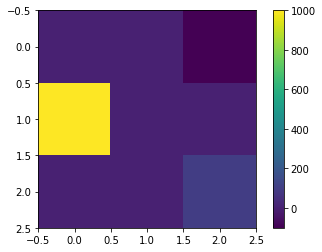

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


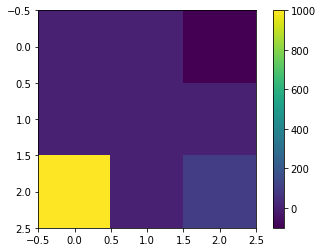

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 58 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


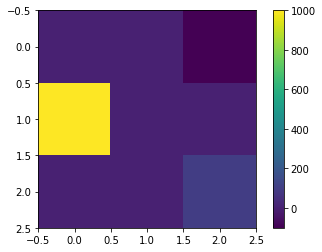

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


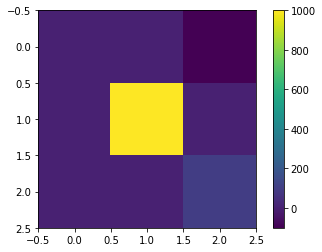

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


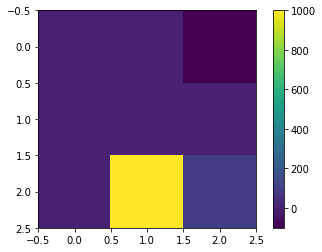

its okay
exploring..
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 59 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 60 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


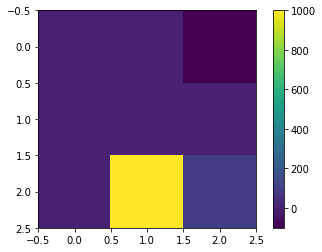

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 61 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 62 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


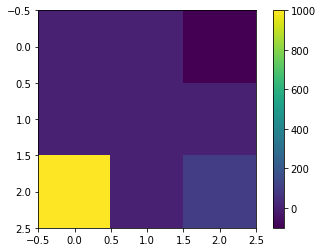

its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 63 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 64 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 65 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100   0   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


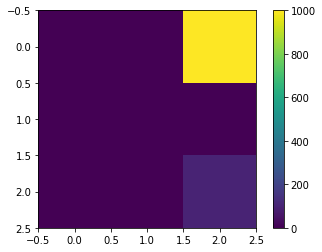

Death
spawned on goal or death
----------------end spot----------------
Episode 66 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 67 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 2
down
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


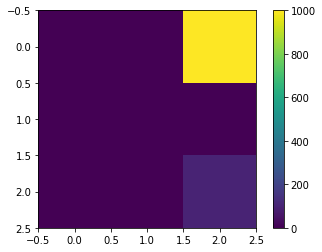

Death
spawned on goal or death
----------------end spot----------------
Episode 68 done ---------------------------------
start of new episode -----------------
random x y 0 2
its okay
exploiting..
[-100    0    0 -100]
False
True
True
False
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 69 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 70 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


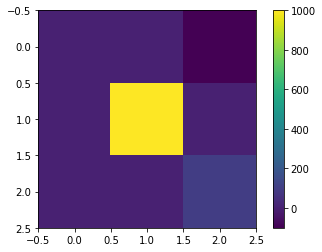

its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


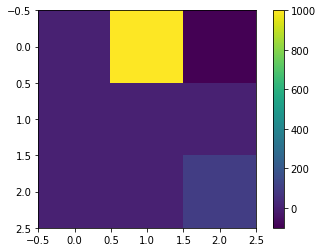

its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


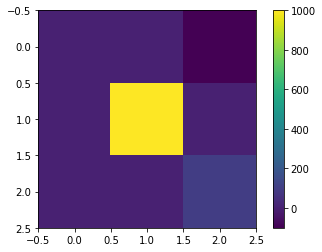

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0 1000]
 [   0    0  100]]


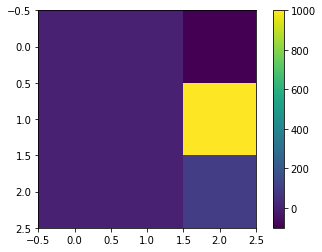

its okay
exploiting..
[100  81   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


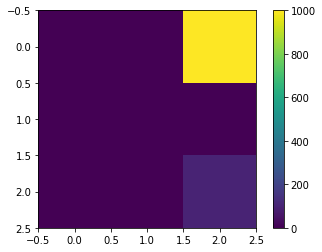

Death
spawned on goal or death
----------------end spot----------------
Episode 71 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


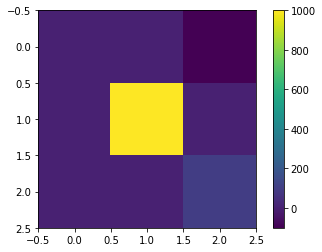

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


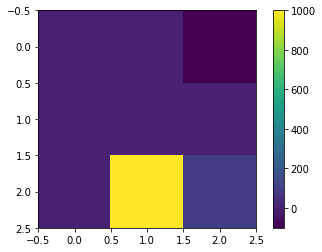

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 72 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


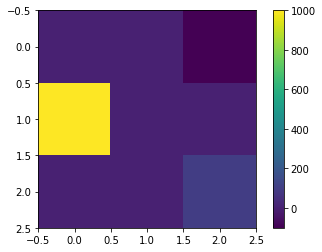

its okay
exploiting..
[81  0  0 64]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


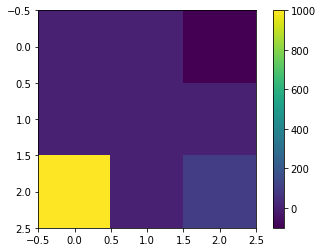

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


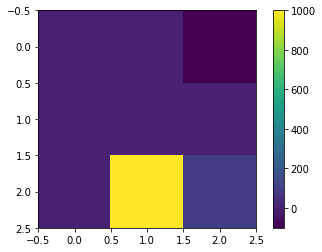

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 73 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 3
up
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


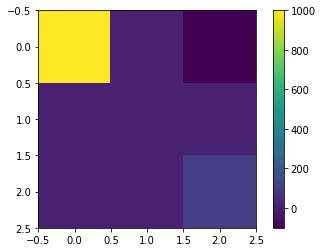

its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


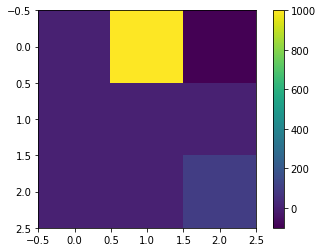

its okay
exploring..
new movement made 2
down
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


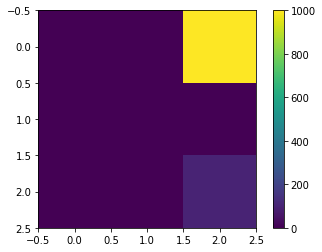

Death
spawned on goal or death
----------------end spot----------------
Episode 74 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 75 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


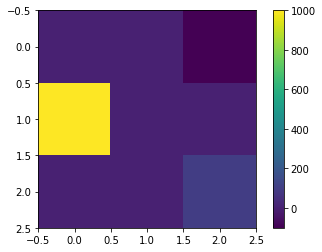

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


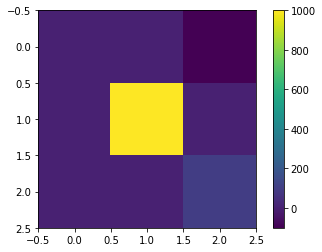

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


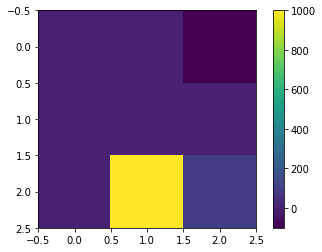

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 76 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploring..
new movement made 1
left
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


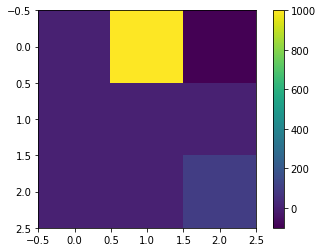

its okay
exploring..
new movement made 3
up
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


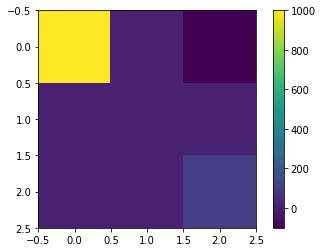

its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


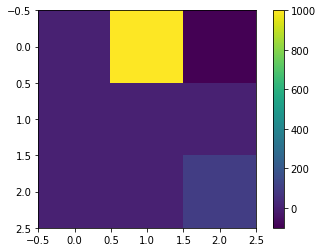

its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


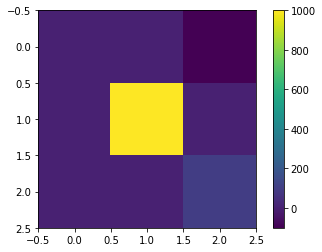

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


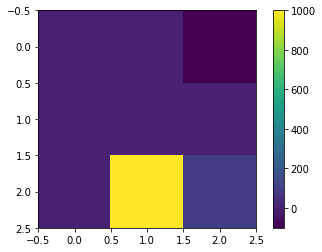

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


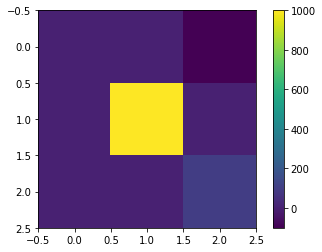

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


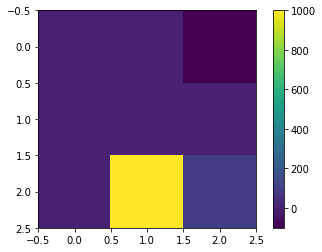

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 77 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


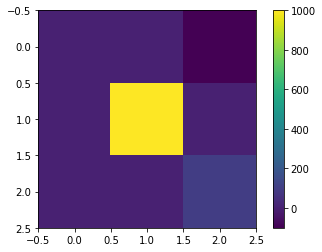

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


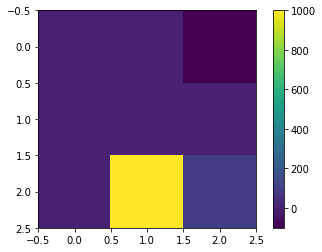

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 78 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 79 done ---------------------------------
start of new episode -----------------
random x y 1 0
its okay
exploring..
new movement made 1
left
went to outer bounds
----------------end spot----------------
Episode 80 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0    0    0]
 [1000    0  100]]


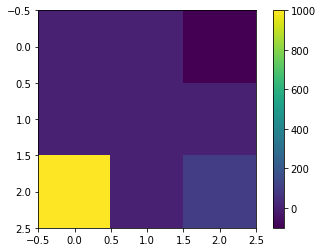

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


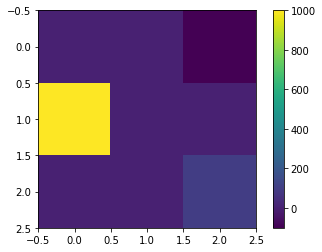

its okay
exploring..
new movement made 3
up
went to outer bounds
----------------end spot----------------
Episode 81 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


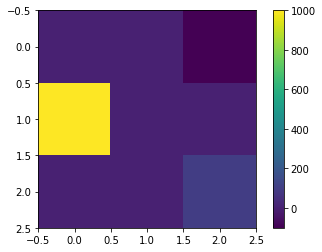

its okay
exploring..
new movement made 3
up
went to outer bounds
----------------end spot----------------
Episode 82 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 83 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 84 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 85 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploring..
new movement made 3
up
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


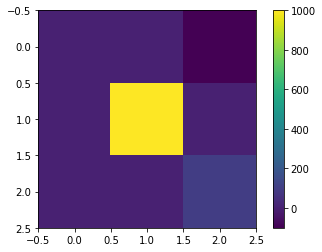

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


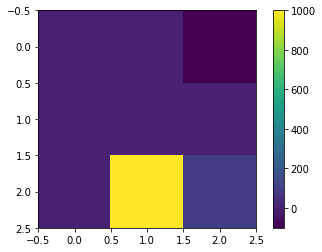

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 86 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 87 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 88 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100  81   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


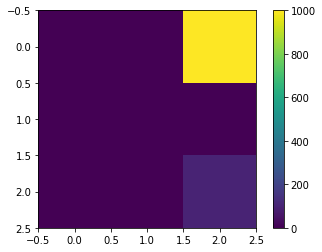

Death
spawned on goal or death
----------------end spot----------------
Episode 89 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 90 done ---------------------------------
start of new episode -----------------
random x y 0 1
its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


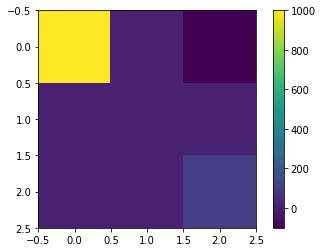

its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


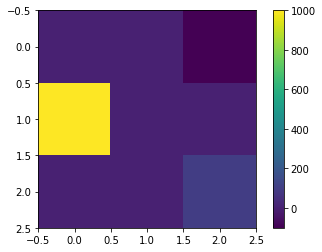

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


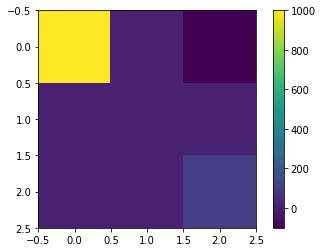

its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


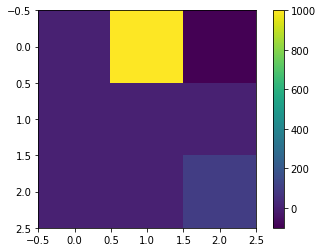

its okay
exploring..
new movement made 3
up
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


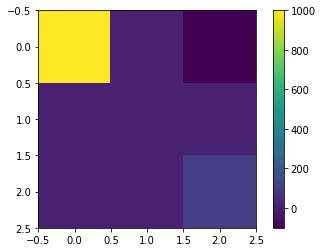

its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


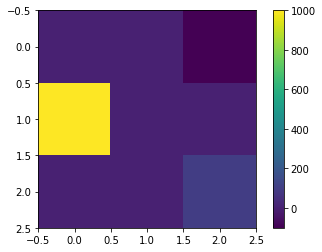

its okay
exploring..
new movement made 2
down
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


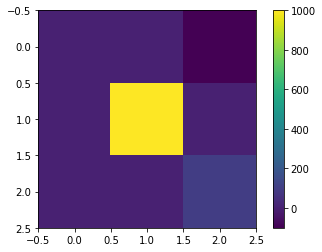

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


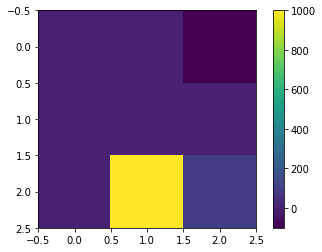

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 91 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploring..
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 92 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100  81   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


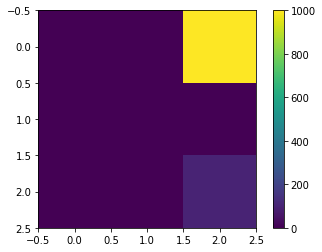

Death
spawned on goal or death
----------------end spot----------------
Episode 93 done ---------------------------------
start of new episode -----------------
random x y 1 2
its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 94 done ---------------------------------
start of new episode -----------------
random x y 2 0
Death
spawned on goal or death
----------------end spot----------------
Episode 95 done ---------------------------------
start of new episode -----------------
random x y 2 1
its okay
exploiting..
[100  81   0  81]
True
True
True
True
WTF 1
new movement made 1
left
[[   0    0 1000]
 [   0    0    0]
 [   0    0  100]]


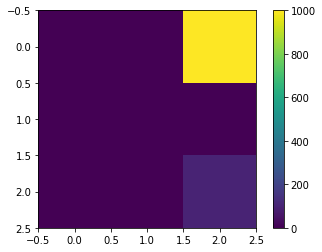

Death
spawned on goal or death
----------------end spot----------------
Episode 96 done ---------------------------------
start of new episode -----------------
random x y 0 0
its okay
exploring..
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


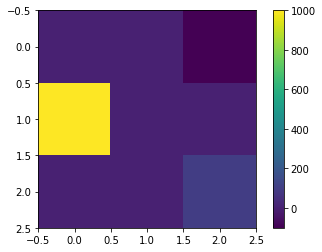

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


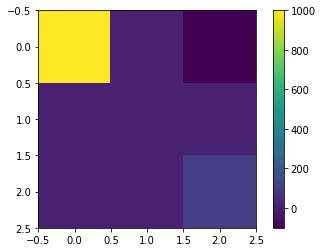

its okay
exploiting..
[  72 -100   72 -100]
True
False
True
False
WTF 0
new movement made 0
right
[[   0    0 -100]
 [1000    0    0]
 [   0    0  100]]


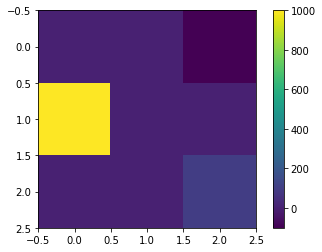

its okay
exploring..
new movement made 1
left
[[1000    0 -100]
 [   0    0    0]
 [   0    0  100]]


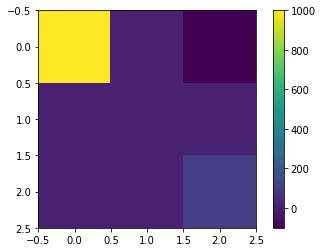

its okay
exploring..
new movement made 2
down
[[   0 1000 -100]
 [   0    0    0]
 [   0    0  100]]


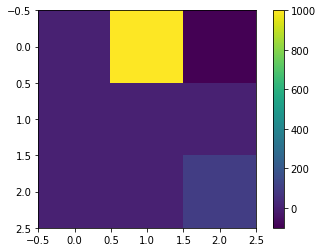

its okay
exploiting..
[81 64 81  0]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


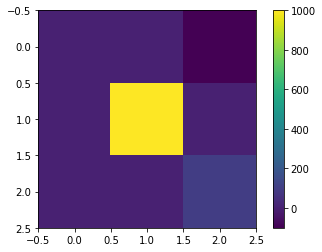

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


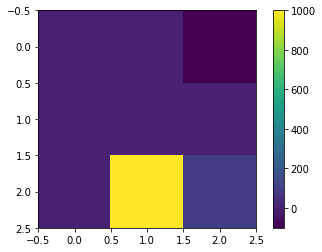

its okay
exploring..
new movement made 1
left
[[   0    0 -100]
 [   0 1000    0]
 [   0    0  100]]


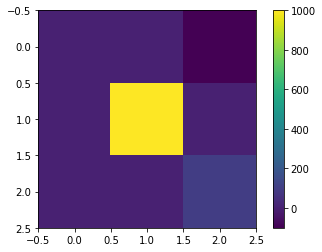

its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


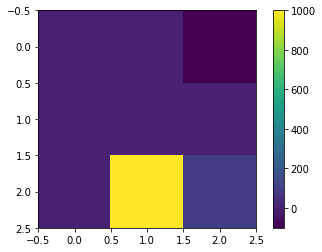

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 97 done ---------------------------------
start of new episode -----------------
random x y 1 1
its okay
exploiting..
[90 72 90 72]
True
True
True
True
WTF 0
new movement made 0
right
[[   0    0 -100]
 [   0    0    0]
 [   0 1000  100]]


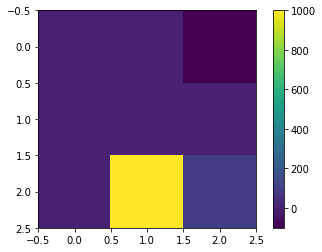

its okay
exploiting..
[  0   0 100  81]
True
True
True
True
WTF 0
new movement made 0
right
went to outer bounds
----------------end spot----------------
Episode 98 done ---------------------------------
start of new episode -----------------
random x y 2 2
win
spawned on goal or death
----------------end spot----------------
Episode 99 done ---------------------------------
Training Done


In [7]:
discount = 0.9
learning_rate = 0.1
epsilon = 0.5 # ratio at which the agent will explore vs exploit
maze_frames = list()

for episode in range(100):
    # reset the maze
    print('start of new episode -----------------')
    maze = load_maze("maze3by3.npy")
    # start off at our random position
    cur_x = random.randint(0,L-1)
    cur_y = random.randint(0,L-1)
    
    print("random x y",cur_x,cur_y)
    p1.set_curr_position(cur_x, cur_y)
    # visual_maze = copy.deepcopy(maze) # its own copy
    visual_maze = load_maze("maze3by3.npy")
    visual_maze[win_x,win_y] = 100
    
    
    visual_maze[cur_y,cur_x] = 1000
    while(not (CheckGameOver(cur_y, cur_x, maze, win_x, win_y))):
        poss_act = getAllPossibleMove(cur_x, cur_y)
        if random.uniform(0,1) < epsilon:
            # Explore: select a random action
            print("exploring..")
            choice = random.choice(poss_act)
        else:
            # Exploit: select action with max value
            print("exploiting..")
            choice = getWinningMove(cur_x, cur_y, q_table, maze)
        p1.movement(maze,choice)
        cur_x_1 = p1.get_x()
        cur_y_1 = p1.get_y()
        
        if cur_x_1 == L or cur_x_1 < 0 or cur_y_1 == L or cur_y_1 < 0:
            print('went to outer bounds')
            break
        
        #print(q_table[cur_x_1,cur_y_1,choice])
        disc = discount *max(q_table[cur_y_1,cur_x_1])-q_table[cur_y,cur_x,choice]
        #print('d',disc)
        stuff = q_table[cur_y, cur_x, choice]+learning_rate*(maze[cur_y,cur_x])
        #print('s',stuff)
        q_table[cur_y,cur_x,choice] = disc + stuff
        
        # movement on the board
        visual_maze[cur_y,cur_x] = 0
        visual_maze[cur_y_1,cur_x_1] = 1000
        print(visual_maze)
        maze_frames.append(visual_maze)
        plt.imshow(visual_maze)
        plt.colorbar()
        plt.show()
        cur_x = cur_x_1
        cur_y = cur_y_1
        #q_table[cur_x,cur_y,choice] = q_table[cur_x, cur_y, choice]+learning_rate*(maze[cur_x,cur_y] + discount *max(q_table[cur_x_1,cur_y_1]-q_table[cur_x,cur_y,choice]))
    else:
        print("spawned on goal or death")
    print('----------------end spot----------------')
    #plt.imshow(visual_maze)
    #plt.show()
    visual_maze[cur_y,cur_x] = 0
    maze_frames.append(visual_maze)
    print("Episode",episode,"done ---------------------------------")
print("Training Done")


random x y 2 1
its okay
ayo
[[     0      0   -100]
 [     0      0      0]
 [     0    100 100000]]
[100  81   0  81]
True
True
True
True
WTF 1
x,y 2 1
new movement made 1
left
choice, 1
--------------------------
[[     0      0   -100]
 [     0      0      0]
 [     0    100 100000]]
neyo
its okay
ayo
[[     0      0   -100]
 [     0      0      0]
 [     0    100 100000]]
[100  81   0  81]
True
True
True
True
WTF 1
x,y 2 1
new movement made 1
left
choice, 1
--------------------------
[[     0      0   -100]
 [     0      0      0]
 [   100      0 100000]]
neyo
its okay
ayo
[[     0      0   -100]
 [     0      0      0]
 [   100      0 100000]]
[ 0 72 90  0]
True
True
True
True
WTF 1
x,y 2 0
new movement made 1
left
choice, 1
--------------------------
[[   0    0 -100]
 [   0    0    0]
 [   0    0  100]]
neyo
fell out of bounds
Episode 0 done ---------------------------------
random x y 0 2
Death
Episode 1 done ---------------------------------
random x y 0 0
its okay
ayo
[[   10

IndexError: index 3 is out of bounds for axis 1 with size 3

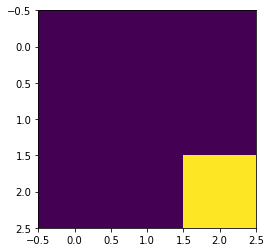

In [9]:

# only picks best path



for episode in range(10):
    # reset the maze
    maze = load_maze("maze3by3.npy")
    # start off at our random position
    cur_x = random.randint(0,L-1)
    cur_y = random.randint(0,L-1)
    print("random x y",cur_x,cur_y)
    p1.set_curr_position(cur_x, cur_y)
    visual_maze = load_maze("maze3by3.npy") # its own copy
    visual_maze[win_x,win_y] = 100000
    visual_maze[cur_x,cur_y] = 100
    #print(visual_maze)
    
    while(not (CheckGameOver(cur_x, cur_y, maze, win_x, win_y))):
        print('ayo')
        visual_maze[cur_x,cur_y] = 100
        print(visual_maze)
        
        choice = getWinningMove(cur_x, cur_y, q_table, maze)
        cur_x_1 = p1.get_x()
        cur_y_1 = p1.get_y()
        print("x,y",cur_x,cur_y)
        
        p1.movement(maze,choice)
        #print(q_table[cur_x_1,cur_y_1,choice])
        
        print('choice,',choice)
        #print(q_table[cur_x_1,cur_y_1,choice])

        
        # movement on the board
        visual_maze[cur_x,cur_y] = 0
        visual_maze[cur_x_1,cur_y_1] = 100
        cur_x = cur_x_1
        cur_y = cur_y_1
        print('--------------------------')
        print(visual_maze)
        plt.imshow(visual_maze)
        print('neyo')
    print("Episode",episode,"done ---------------------------------")
print("Training Done")



In [ ]:
q_table